In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

2025-05-25 12:28:22.935958: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-05-25 12:28:22.937606: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2025-05-25 12:28:22.961802: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-05-25 12:28:22.961823: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-05-25 12:28:22.962482: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to

In [2]:
# train_datagen = ImageDataGenerator(rescale = 1./255,
#                                    shear_range = 0.2,
#                                    zoom_range = 0.2,
#                                    horizontal_flip = True)

train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)

training_set = train_datagen.flow_from_directory('dataset/training_set',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

Found 8000 images belonging to 2 classes.


In [3]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('dataset/test_set',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 2000 images belonging to 2 classes.


In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint



cnn = Sequential()

cnn.add(Conv2D(32, (3,3), activation='relu', input_shape=(64,64,3)))
cnn.add(BatchNormalization())
cnn.add(MaxPool2D(2,2))

cnn.add(Conv2D(64, (3,3), activation='relu'))
cnn.add(BatchNormalization())
cnn.add(MaxPool2D(2,2))

cnn.add(Conv2D(128, (3,3), activation='relu'))
cnn.add(BatchNormalization())
cnn.add(MaxPool2D(2,2))

cnn.add(Flatten())

cnn.add(Dense(128, activation='relu'))
cnn.add(Dropout(0.5))

cnn.add(Dense(1, activation='sigmoid'))

# کامپایل
cnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [5]:
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True, verbose=1)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1)
checkpoint = ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True, verbose=1)

# آموزش مدل
history = cnn.fit(
    training_set,
    validation_data=test_set,
    epochs=25,
    callbacks=[early_stop, reduce_lr, checkpoint]
)

Epoch 1/25
250/250 [==============================] - ETA: 0s - loss: 0.7494 - accuracy: 0.5987
Epoch 1: val_loss improved from inf to 0.83222, saving model to best_model.h5
250/250 [==============================] - 24s 93ms/step - loss: 0.7494 - accuracy: 0.5987 - val_loss: 0.8322 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 2/25


/home/amir-daneshmand/anaconda3/envs/myenv/lib/python3.10/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


250/250 [==============================] - ETA: 0s - loss: 0.6397 - accuracy: 0.6428
Epoch 2: val_loss improved from 0.83222 to 0.64420, saving model to best_model.h5
250/250 [==============================] - 23s 93ms/step - loss: 0.6397 - accuracy: 0.6428 - val_loss: 0.6442 - val_accuracy: 0.5995 - lr: 0.0010
Epoch 3/25
250/250 [==============================] - ETA: 0s - loss: 0.6157 - accuracy: 0.6589
Epoch 3: val_loss improved from 0.64420 to 0.57689, saving model to best_model.h5
250/250 [==============================] - 23s 92ms/step - loss: 0.6157 - accuracy: 0.6589 - val_loss: 0.5769 - val_accuracy: 0.6885 - lr: 0.0010
Epoch 4/25
250/250 [==============================] - ETA: 0s - loss: 0.5985 - accuracy: 0.6801
Epoch 4: val_loss did not improve from 0.57689
250/250 [==============================] - 23s 91ms/step - loss: 0.5985 - accuracy: 0.6801 - val_loss: 0.6403 - val_accuracy: 0.6165 - lr: 0.0010
Epoch 5/25
250/250 [==============================] - ETA: 0s - loss: 0.57

In [10]:
cnn.save('cat_dog_classifier_model.h5')
from tensorflow.keras.models import load_model
cnn = load_model('cat_dog_classifier_model.h5')

/home/amir-daneshmand/anaconda3/envs/myenv/lib/python3.10/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [11]:
import numpy as np
from tensorflow.keras.preprocessing import image

def test(addr):
    test_image = image.load_img(addr, target_size=(64, 64))
    test_image = image.img_to_array(test_image)
    test_image = test_image / 255.0  # نرمال‌سازی مثل آموزش
    test_image = np.expand_dims(test_image, axis=0)

    result = cnn.predict(test_image)[0][0]
    
    # نمایش میزان اطمینان مدل
    print(f"Prediction confidence: {result:.4f}")

    if result > 0.5:
        prediction = 'dog'
    else:
        prediction = 'cat'
    
    print(f"Prediction: {prediction}")  

test('dataset/single_prediction/cat_or_dog_1.jpg')
test('dataset/single_prediction/cat_or_dog_2.jpg')

1/1 [==============================] - 0s 52ms/step
Prediction confidence: 0.9989
Prediction: dog
1/1 [==============================] - 0s 12ms/step
Prediction confidence: 0.4059
Prediction: cat


In [12]:
loss, accuracy = cnn.evaluate(test_set)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

63/63 [==============================] - 3s 50ms/step - loss: 0.3221 - accuracy: 0.8575
Test Accuracy: 85.75%


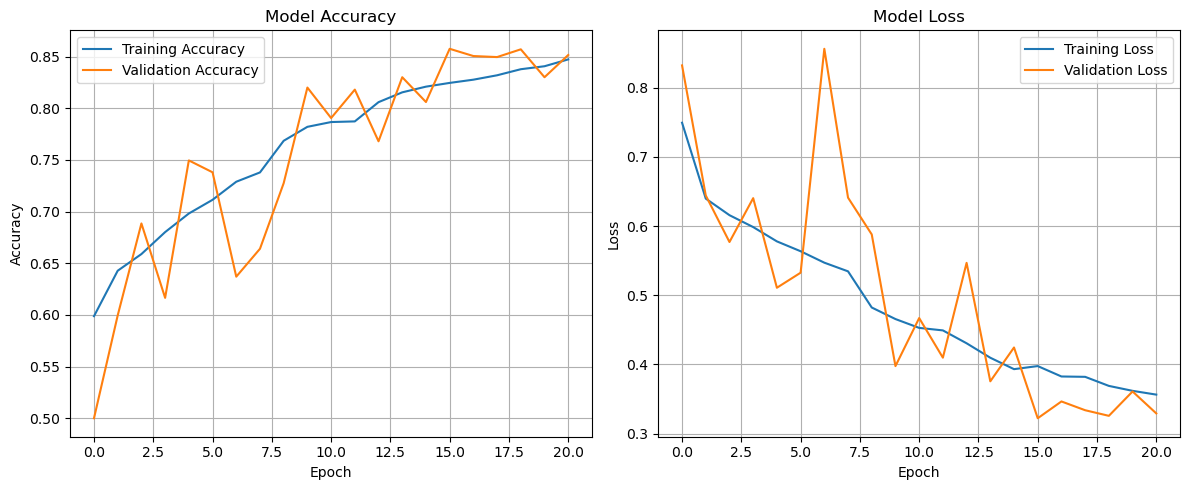

In [8]:
import matplotlib.pyplot as plt

# 📊 دقت (Accuracy)
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# 📉 خطا (Loss)
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()